
### Bernoulli Naive Base - Sentiment Analysis
#### Dataset:MDB Movie Reviews dataset

#### Objective:
The objective is to classify movie reviews as 'positive' or 'negative' by using the IMDB movie reviews dataset.

#### Description:
We have divided the data into training and test sets. The training set contains 800 positive and 800 negative movie reviews whereas the test set contains 200 positive and 200  negative movie reviews.

This was one of the first widely-available sentiment analysis datasets compiled by Pang and Lee's. The data was first collected in 2002, however, the text is similar to movies reviews you find on IMDB today. The dataset is in a CSV format. It has two categories: Pos (reviews that express a positive or favourable sentiment) and Neg (reviews that express a negative or unfavourable sentiment). For this exercise, we will assume that all reviews are either positive or negative; there are no neutral reviews.


You will need to build a Multinomial Naive Bayes classification model in Python for solving the questions.


Note: 

Tag negative(Neg) as 0 and positive(Pos) as 1.

### 1. Importing and Preprocessing Data

In [55]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer

from scipy.sparse import csr_matrix


In [29]:
# Read training data set
review_train=pd.read_csv('movie_review_train.csv')
review_train

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...
...,...,...
1595,Neg,if anything stigmata should be taken as...
1596,Neg,john boorman s zardoz is a goofy cinemati...
1597,Neg,the kids in the hall are an acquired taste ...
1598,Neg,there was a time when john carpenter was a gr...


In [30]:
# Reading test dataset
review_test=pd.read_csv('movie_review_test.csv')
review_test

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...
...,...,...
395,Neg,one of the first films of 1999 is this mtv pi...
396,Neg,susan granger s review of america s sweethe...
397,Neg,susan granger s review of jeepers creepers ...
398,Neg,this independent film written and directed by...


In [31]:
# shpe of train dataset
review_train.shape

(1600, 2)

In [32]:
# shpe of test dataset
review_test.shape

(400, 2)

In [33]:
#info of train dataset
review_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   1600 non-null   object
 1   text    1600 non-null   object
dtypes: object(2)
memory usage: 25.1+ KB


In [34]:
#info of test dataset
review_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   400 non-null    object
 1   text    400 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


In [35]:
# Count of each category of train dataset
pos_neg=review_train['class'].value_counts()
pos_neg


Pos    800
Neg    800
Name: class, dtype: int64

In [37]:
# Count of each category of test dataset
pos_neg_test=review_test['class'].value_counts()
pos_neg_test

Neg    200
Pos    200
Name: class, dtype: int64

In [38]:
# Positive rate of training dataset
print("Positive rate is {0}%".format(round((pos_neg[1]/float(pos_neg[0]+pos_neg[1])) *100,2)))

Positive rate is 50.0%


In [39]:
# Positive rate of test dataset
print("Positive rate is {0}%".format(round((pos_neg_test[1]/float(pos_neg_test[0]+pos_neg_test[1])) *100,2)))

Positive rate is 50.0%


In [40]:
# Trimming leading and trailing spaces in Class column of training dataset
review_train['class']=review_train['class'].apply(lambda x: x.strip())

In [41]:
# Trimming leading and trailing spaces in Class column of test dataset
review_test['class']=review_test['class'].apply(lambda x: x.strip())

In [42]:
# Mapping of Class pos to 1 and neg to 0 of train dataset 
review_train['label']=review_train['class'].map({'Pos':1,'Neg':0})
review_train.head()

,class,text,label
0,Pos,a common complaint amongst film critics is ...,1
1,Pos,whew this film oozes energy the kind of b...,1
2,Pos,steven spielberg s amistad which is bas...,1
3,Pos,he has spent his entire life in an awful litt...,1
4,Pos,being that it is a foreign language film with...,1


In [43]:
# Mapping of Class pos to 1 and neg to 0 of test dataset 
review_test['label']=review_test['class'].map({'Pos':1,'Neg':0})
review_test.head()

,class,text,label
0,Pos,films adapted from comic books have had plent...,1
1,Pos,every now and then a movie comes along from a...,1
2,Pos,you ve got mail works alot better than it des...,1
3,Pos,jaws is a rare film that grabs your atte...,1
4,Pos,moviemaking is a lot like being the general m...,1


In [44]:
# Let's drop the column class of training dataset
review_train=review_train.drop('class', axis=1)
review_train

,text,label
0,a common complaint amongst film critics is ...,1
1,whew this film oozes energy the kind of b...,1
2,steven spielberg s amistad which is bas...,1
3,he has spent his entire life in an awful litt...,1
4,being that it is a foreign language film with...,1
...,...,...
1595,if anything stigmata should be taken as...,0
1596,john boorman s zardoz is a goofy cinemati...,0
1597,the kids in the hall are an acquired taste ...,0
1598,there was a time when john carpenter was a gr...,0


In [45]:
# Let's drop the column class of test dataset
review_test=review_test.drop('class', axis=1)
review_test

,text,label
0,films adapted from comic books have had plent...,1
1,every now and then a movie comes along from a...,1
2,you ve got mail works alot better than it des...,1
3,jaws is a rare film that grabs your atte...,1
4,moviemaking is a lot like being the general m...,1
...,...,...
395,one of the first films of 1999 is this mtv pi...,0
396,susan granger s review of america s sweethe...,0
397,susan granger s review of jeepers creepers ...,0
398,this independent film written and directed by...,0


In [46]:
# Split into X and y of train dataset
X_train=review_train['text']
y_train=review_train['label']
print(X_train.shape)
print(y_train.shape)

(1600,)
(1600,)


In [47]:
# Split into X and y of test dataset
X_test=review_test['text']
y_test=review_test['label']
print(X_test.shape)
print(y_test.shape)

(400,)
(400,)


In [11]:
# Vectorizing sentences in text column and removing stop words
vect=CountVectorizer(stop_words='english')


In [13]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [14]:
# Printing vocabulary
vect.vocabulary_

{'common': 6284,
 'complaint': 6360,
 'film': 11832,
 'critics': 7378,
 'aren': 1810,
 'literate': 18603,
 'scripts': 27918,
 'available': 2319,
 'quiz': 25250,
 'gives': 13262,
 'signs': 28809,
 'hope': 15074,
 'art': 1928,
 'writing': 35521,
 'isn': 16771,
 'dead': 7904,
 'hollywood': 14963,
 'need': 21281,
 'look': 18770,
 'independent': 15988,
 'films': 11851,
 'thoughtful': 32060,
 'content': 6771,
 'paul': 23045,
 'attanasio': 2173,
 'script': 27912,
 'takes': 31486,
 'tepid': 31839,
 'thriller': 32090,
 'scandals': 27629,
 'late': 18017,
 '50s': 313,
 'delivers': 8215,
 'telling': 31765,
 'parable': 22815,
 'emptiness': 10340,
 'post': 24178,
 'war': 34707,
 'american': 1334,
 'dream': 9554,
 'golden': 13449,
 'bubble': 4285,
 'surrounds': 31156,
 'protects': 24849,
 'tv': 33056,
 'networks': 21378,
 'sponsors': 29948,
 'riddled': 26743,
 'symbols': 31370,
 '58': 328,
 'chrysler': 5614,
 'radio': 25314,
 'announcement': 1534,
 'sputnik': 30053,
 'heavy': 14532,
 'handed': 14185,

In [16]:
# Len of vocabulary
len(vect.vocabulary_.keys())

35858

In [17]:
# Vectorizing sentences in text column and removing stop words. which have appeared only in 3% of the documents,
#or say those (extremely common ones) which have appeared in 80% of the documents.
vect=CountVectorizer(stop_words='english', min_df=0.03, max_df=0.8)

In [18]:
# fit the training dataset again
vect.fit(X_train)

CountVectorizer(max_df=0.8, min_df=0.03, stop_words='english')

In [19]:
# Printing vocabulary again
vect.vocabulary_

{'common': 264,
 'critics': 323,
 'aren': 78,
 'available': 101,
 'gives': 618,
 'hope': 693,
 'art': 81,
 'writing': 1632,
 'isn': 753,
 'dead': 342,
 'hollywood': 690,
 'need': 970,
 'look': 853,
 'films': 549,
 'content': 287,
 'paul': 1037,
 'script': 1248,
 'takes': 1429,
 'thriller': 1471,
 'late': 805,
 'delivers': 357,
 'telling': 1449,
 'post': 1089,
 'war': 1571,
 'american': 59,
 'dream': 413,
 'tv': 1512,
 'radio': 1145,
 'heavy': 673,
 'direction': 386,
 'robert': 1205,
 'performances': 1043,
 'john': 766,
 'rob': 1204,
 'perfectly': 1041,
 'usually': 1537,
 'quality': 1136,
 'sets': 1272,
 'camera': 192,
 'work': 1618,
 'recent': 1165,
 'century': 213,
 'period': 1044,
 'pieces': 1056,
 'years': 1638,
 'old': 1001,
 'images': 716,
 'true': 1502,
 'era': 464,
 'generation': 605,
 'gone': 625,
 '15': 4,
 'world': 1623,
 'themes': 1461,
 'good': 626,
 'life': 831,
 'family': 508,
 'match': 894,
 'father': 521,
 'fame': 506,
 'audience': 99,
 'appear': 72,
 'familiar': 507,
 

In [21]:
# Let's check Len of vocabulary again- vocab size
len(vect.vocabulary_.keys())

1643

In [48]:
# transforming train and test dataset
X_train_transformed=vect.transform(X_train)
X_test_transformed=vect.transform(X_test)

In [49]:
# Plz note that type is transformed(sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 4)	1
  (0, 59)	2
  (0, 72)	1
  (0, 78)	1
  (0, 81)	1
  (0, 99)	3
  (0, 101)	1
  (0, 192)	1
  (0, 211)	1
  (0, 213)	1
  (0, 220)	1
  (0, 264)	2
  (0, 287)	1
  (0, 316)	1
  (0, 323)	1
  (0, 328)	1
  (0, 340)	1
  (0, 342)	1
  (0, 357)	1
  (0, 386)	1
  (0, 413)	2
  (0, 445)	2
  (0, 464)	1
  (0, 503)	1
  (0, 506)	1
  :	:
  (1599, 1247)	1
  (1599, 1258)	2
  (1599, 1267)	1
  (1599, 1271)	1
  (1599, 1331)	1
  (1599, 1335)	1
  (1599, 1339)	1
  (1599, 1366)	3
  (1599, 1371)	1
  (1599, 1375)	1
  (1599, 1379)	1
  (1599, 1413)	1
  (1599, 1421)	1
  (1599, 1429)	2
  (1599, 1447)	1
  (1599, 1501)	1
  (1599, 1533)	1
  (1599, 1550)	1
  (1599, 1555)	1
  (1599, 1556)	1
  (1599, 1570)	1
  (1599, 1579)	2
  (1599, 1589)	1
  (1599, 1609)	1
  (1599, 1616)	1


In [57]:
# Count of nonzero entries in the sparse matrix (corresponding to the test data)
cnt_nonzero_sparse=csr_matrix.count_nonzero(X_test_transformed)
print(cnt_nonzero_sparse)

51663


### 2. Building and Evaluating the Model

In [58]:
# Import library
from sklearn.naive_bayes import BernoulliNB

# Instantiate the object
bnb=BernoulliNB()

# fit train dataset
bnb.fit(X_train_transformed,y_train)

# Predict class
y_pred_class=bnb.predict(X_test_transformed)

# Predict Probability
y_pred_proba=bnb.predict_proba(X_test_transformed)

# Accuracy
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)


0.79

In [59]:
# Confusion Matrix
metrics.confusion_matrix(y_test,y_pred_class)

array([[177,  23],
       [ 61, 139]], dtype=int64)

In [60]:
confusion=metrics.confusion_matrix(y_test,y_pred_class)
print(confusion)
#row, column
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

[[177  23]
 [ 61 139]]


In [61]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.695


In [62]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 0.885


In [63]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.8580246913580247
0.8580246913580247


In [64]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.8580246913580247
PRECISION SCORE : 0.8580246913580247
RECALL SCORE : 0.695
F1 SCORE : 0.7679558011049723


In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [66]:
print (roc_auc)

0.87275


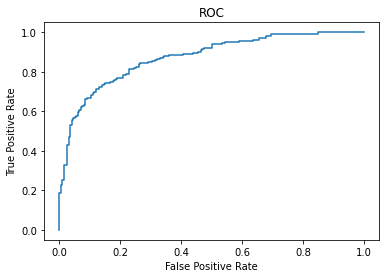

In [68]:
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.show()